In [1]:
from dqn_agent import DQNAgent as DQN

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
names=[] # keep track of names for plotting at the end

# basic parameters
p = dict(
    env_name =              'BreakoutNoFrameskip-v4', # use NoFrameskip-v4 version
    group_dir=              'SI_tests',
    name =                  'DDQN',

    data_plotting =         True,
    
    screen_size=            42,
    eval_interval=          100_000,
    max_steps=              20_000_000, 
    record_interval=        5_000_000, 
    n_games_per_eval=       5,
    pbar_update_interval=   800,
    seed=                   17,
    n_envs =                1
    )
dqn = DQN(p)


Creating new directory: logs/SI_tests_31


A.L.E: Arcade Learning Environment (version 0.10.1+unknown)
[Powered by Stella]


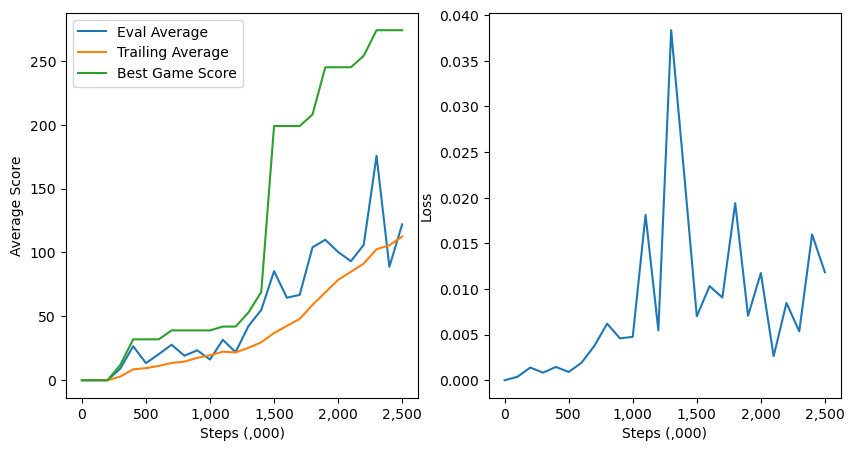

RuntimeError: Parent directory logs/SI_tests_31/DDQN_checkpoints does not exist.

In [2]:
dqn.train()
names.append(dqn.filepaths.sub_dir)

In [ ]:
''' Vanilla DQN'''

p.update(
    name=               'DQN',
    doubleQ=            False,
    dueling=            False,
    noisy_linear=       False,
    categorical_DQN=    False,
    prioritized_replay= False,
    n_step_learning=    False,
    )
dqn = DQN(p)
dqn.train()
names.append(dqn.filepaths.sub_dir)


In [ ]:
''' Rainbow DQN'''

p.update(
    name=               'Rainbow',
    doubleQ=            True,
    dueling=            True,
    noisy_linear=       True,
    categorical_DQN=    True,
    prioritized_replay= True,
    n_step_learning=    True,
    )
dqn = DQN(p)
dqn.train()
names.append(dqn.filepaths.sub_dir)



In [ ]:
# plot all the results in the log folder
import importlib, os
import modules.utils
importlib.reload(modules.utils)
plot = modules.utils.plot_multiple_results

col = 'trailing_avg'; assert col in ['best_score','eval_avg','trailing_avg','loss']
plot( names, 'trailing_avg')
